In [261]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from time import sleep
from scipy import stats
sns.set(color_codes = True)

# 1. Confirmed Covid-19 Cases for randomly chosen 20 countries on the most recent dataset acquired through github

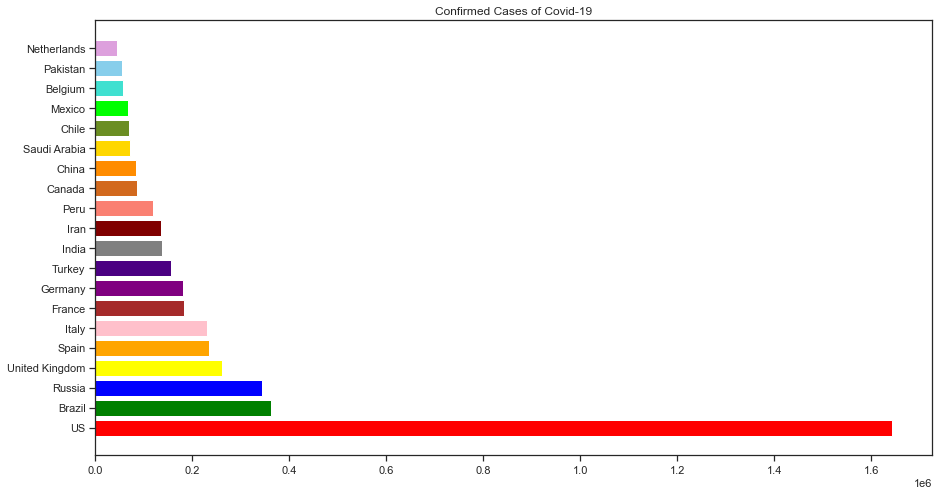

In [300]:
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(URL_DATASET, usecols = ['Date', 'Country', 'Confirmed'])

list_dates = df['Date'].unique()

fig, ax = plt.subplots(figsize=(15, 8))

list_countries = ['Pakistan', 'China', 'US', 'Italy', 'United Kingdom', 'India', 'Russia', 'Brazil', 'Spain', 'France' , 'Germany', 'Turkey', 'Iran', 'Peru', 'Canada', 'Saudi Arabia', 'Mexico', 'Belgium', 'Chile', 'Netherlands' ]
list_colors = ['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'brown', 'purple', 'indigo' , 'grey', 'maroon', 'salmon', 'chocolate', 'darkorange', 'gold', 'olivedrab', 'lime', 'turquoise', 'skyblue', 'plum']

def plot_bar(some_date):
    df2 = df[df['Date'].eq(some_date)]
    ax.clear()
    df3 = df2.sort_values(by = 'Confirmed', ascending = False)
    df4 = df3[df3['Country'].isin(list_countries)]
    sleep(0.2)
    return ax.barh(df4['Country'], df4['Confirmed'], color= list_colors)

my_anim = animation.FuncAnimation(fig = fig, func = plot_bar, 
                    frames= list_dates, blit=True, 
                    interval=100)

#please insert your path
path_mp4 = r'C:\Users\Sineha\Documents\covid\covid19.mp4'  
my_anim.save(filename = path_mp4, writer = 'ffmpeg', 
             fps=30, 
             extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
plt.title('Confirmed Cases of Covid-19')
plt.show()

# 2. Deaths due to Covid-19 for randomly chosen 20 countries on the most recent dataset acquired through github

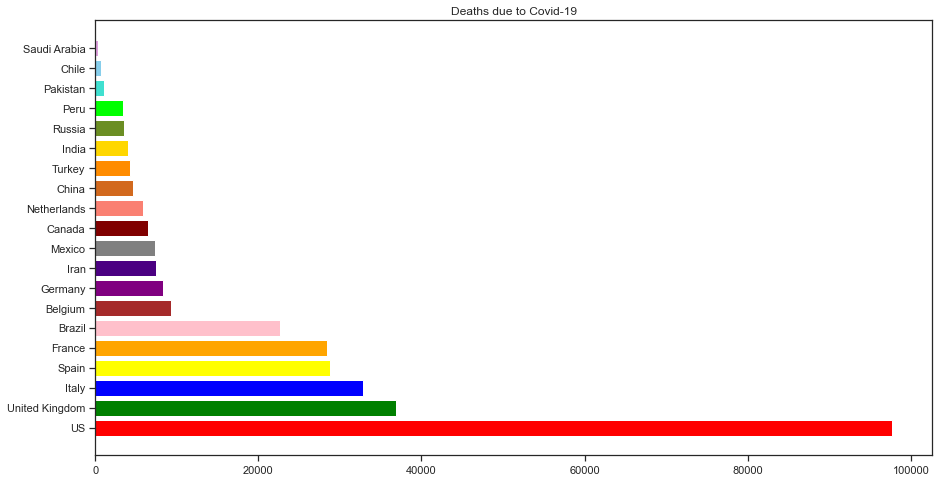

In [301]:
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(URL_DATASET, usecols = ['Date', 'Country', 'Deaths'])

list_dates = df['Date'].unique()

fig, ax = plt.subplots(figsize=(15, 8))

list_countries = ['Pakistan', 'China', 'US', 'Italy', 'United Kingdom', 'India', 'Russia', 'Brazil', 'Spain', 'France' , 'Germany', 'Turkey', 'Iran', 'Peru', 'Canada', 'Saudi Arabia', 'Mexico', 'Belgium', 'Chile', 'Netherlands' ]
list_colors = ['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'brown', 'purple', 'indigo' , 'grey', 'maroon', 'salmon', 'chocolate', 'darkorange', 'gold', 'olivedrab', 'lime', 'turquoise', 'skyblue', 'plum']

def plot_bar(some_date):
    df2 = df[df['Date'].eq(some_date)]
    ax.clear()
    df3 = df2.sort_values(by = 'Deaths', ascending = False)
    df4 = df3[df3['Country'].isin(list_countries)]
    sleep(1)
    return ax.barh(df4['Country'], df4['Deaths'], color= list_colors)

my_anim = animation.FuncAnimation(fig = fig, func = plot_bar, 
                    frames= list_dates, blit=True, 
                    interval=100)
#please insert your path
path_mp4 = r'C:\Users\Sineha\Documents\covid\covid19Deaths.mp4'  
my_anim.save(filename = path_mp4, writer = 'ffmpeg', 
             fps=30, 
             extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
plt.title('Deaths due to Covid-19')
plt.show()

# 3. Implementation of data visualization techniques learnt in class

In [407]:
#cleaning data
df = pd.read_csv('countries-aggregated.csv', usecols = ['Date', 'Country', 'Confirmed','Deaths', 'Recovered'])
list_countries = ['Pakistan', 'China', 'US', 'Italy', 'United Kingdom', 'India', 'Russia', 'Brazil', 'Spain', 'France']
list_dates = ['5/24/2020']
df2 = df[df['Country'].isin(list_countries)]
df3=df2[df2['Date'].isin(list_dates)]

## Plots

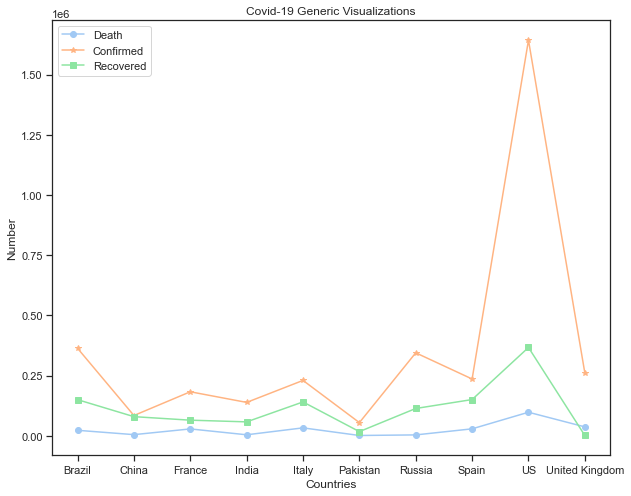

In [394]:
#use of figsize with width of 10 inches and height of 8 inches
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(df3.Country, df3.Deaths, label="Death",marker="o")
#use of line styling through markers
plt.plot(df3.Country, df3.Confirmed, label="Confirmed",marker="*")
plt.plot(df3.Country, df3.Recovered, label="Recovered",marker="s")
#labelling of axis
plt.xlabel("Countries")
plt.ylabel("Number")
#setting up title
plt.title("Covid-19 Generic Visualizations")
#use of legends
plt.legend()
#basic line plot with multiple lines
plt.show()

## Subplots

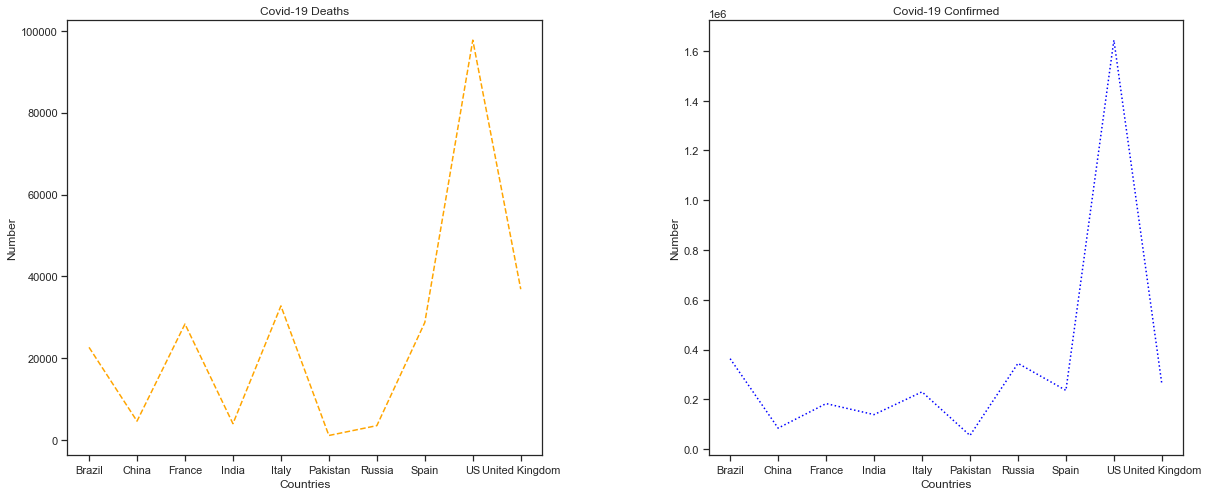

In [395]:
fig, ax = plt.subplots(figsize=(20, 8))

plt.subplot(1,2,1)
#use of line colors
plt.plot(df3.Country, df3.Deaths, label="Death", color="orange", linestyle='--')
plt.xlabel("Countries")
plt.ylabel("Number")
plt.title("Covid-19 Deaths")

#use of subplots
plt.subplot(1,2,2) 
#using linestyles
plt.plot(df3.Country, df3.Confirmed, label="Confirmed", color="blue", linestyle=':')
#use of graph titles
plt.title("Covid-19 Confirmed")
plt.xlabel("Countries")
plt.ylabel("Number")

#adjusting subplots
plt.subplots_adjust(wspace=0.35)
#plt.legend()
plt.show()

## Bar Graphs

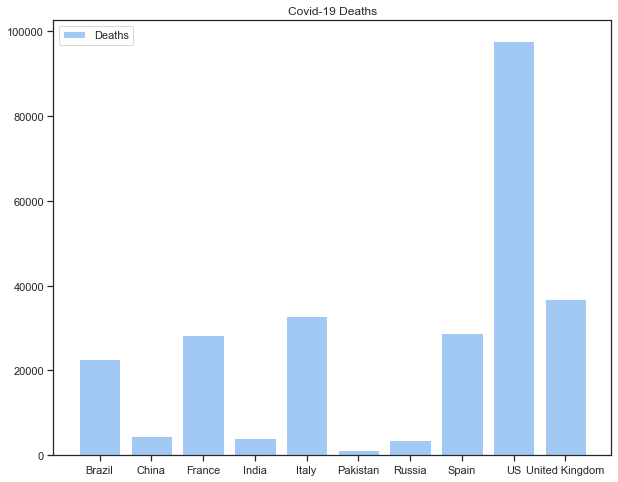

In [396]:
fig, ax = plt.subplots(figsize=(10, 8))
#basic bar chart
plt.bar(df3.Country, df3.Deaths,label="Deaths")
plt.legend()
plt.title("Covid-19 Deaths")
plt.show()

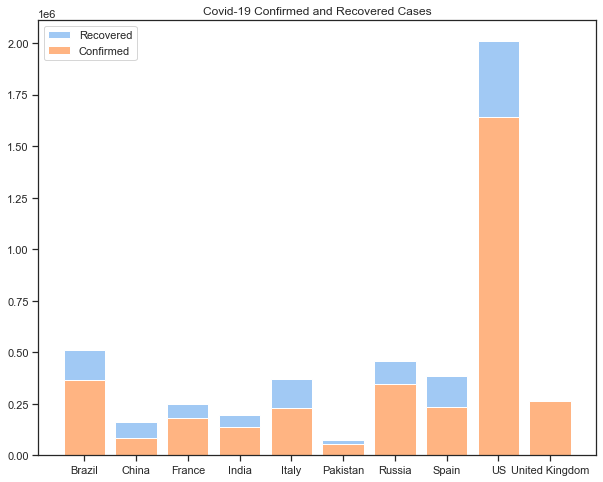

In [397]:
fig, ax = plt.subplots(figsize=(10, 8))
#stacked bars for recovered and confirmed
plt.bar(df3.Country, df3.Recovered,label="Recovered",bottom=df3.Confirmed)
plt.bar(df3.Country, df3.Confirmed,label="Confirmed")
plt.title("Covid-19 Confirmed and Recovered Cases")
plt.legend()
plt.show()

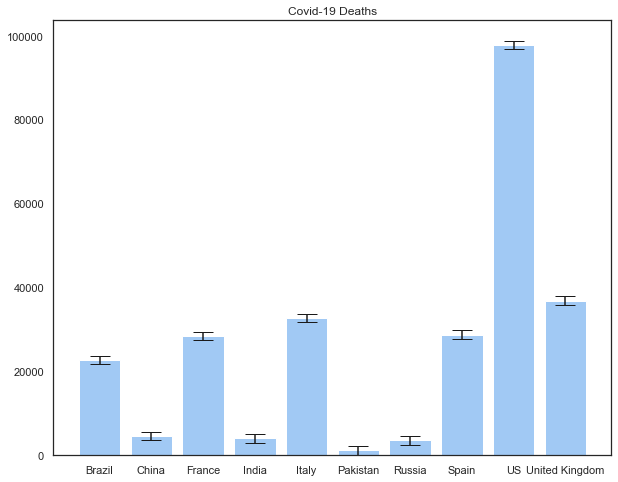

In [405]:
fig, ax = plt.subplots(figsize=(10, 8))
yerr = 1000
#use of error bars with error of 1000
plt.bar(df3.Country, df3.Deaths,yerr=yerr, capsize=10)
plt.title("Covid-19 Deaths")
plt.show()

## Pie Charts

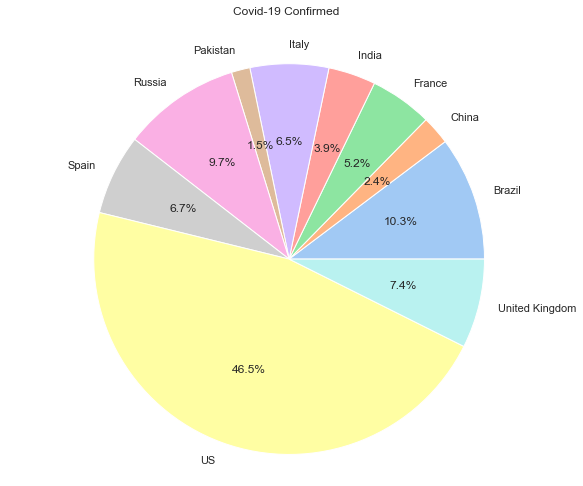

In [399]:
fig, ax = plt.subplots(figsize=(10, 8))
#use of labels along with percentile and equal axis to plot piechart
plt.pie(df3.Confirmed,labels=df3.Country,autopct='%0.1f%%')
plt.axis('equal')
plt.title("Covid-19 Confirmed\n\n")
plt.show()

## Histogram 

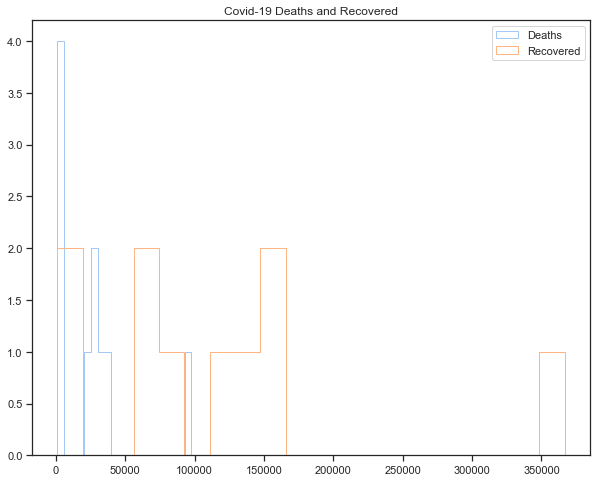

In [400]:
fig, ax = plt.subplots(figsize=(10, 8))
#multiple histogram plot
plt.hist(df3.Deaths, bins=20, histtype='step',label="Deaths")
#histtype defined
plt.hist(df3.Recovered, bins=20, histtype='step',label="Recovered")
plt.title("Covid-19 Deaths and Recovered")
plt.legend()
plt.show()

## Bar Plots

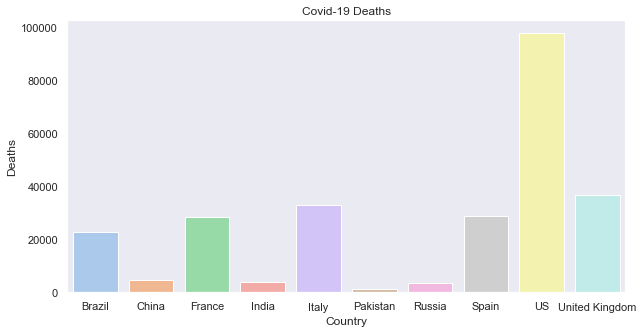

In [401]:
#use of sns started
#style set to dark
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
#bar plots
sns.barplot(data=df3, x="Country", y="Deaths")
plt.title("Covid-19 Deaths")
plt.show()

## Rel Plots

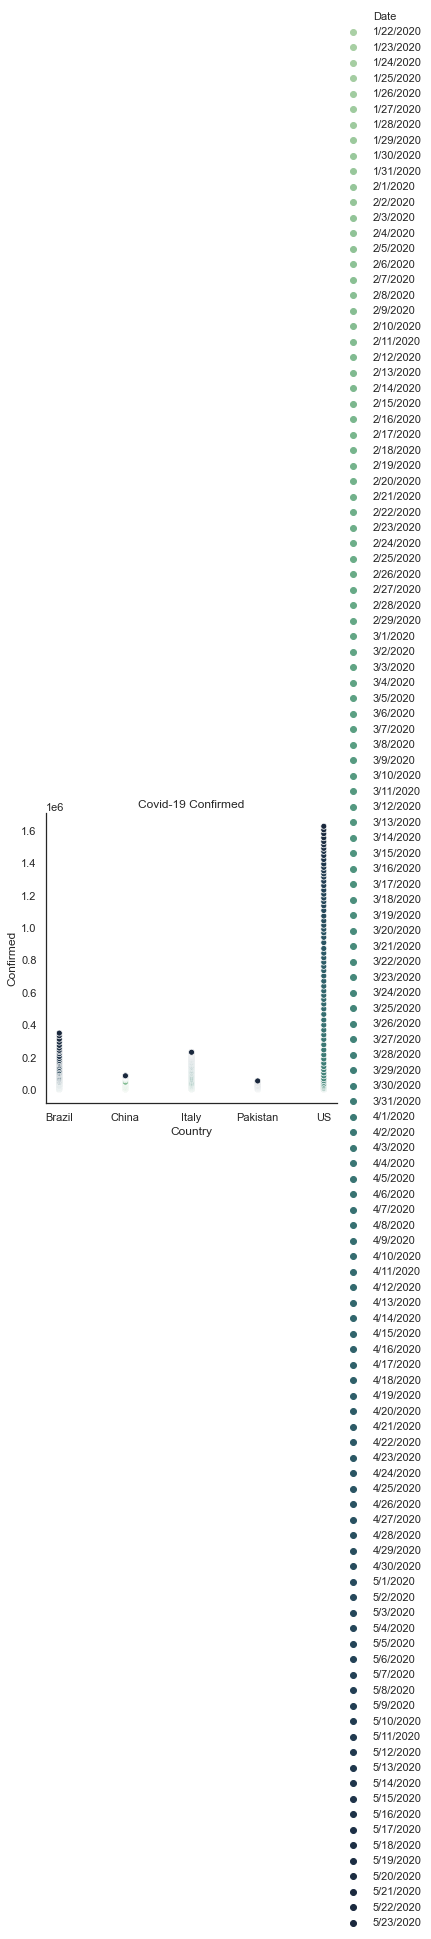

In [402]:
#relplots with white styling
sns.set_style("white")
sns.relplot(x="Country", y="Confirmed", hue="Date", palette="ch:r=-.5,l=.75", data=df4)
plt.title("Covid-19 Confirmed")
plt.show()

In [408]:
countries = ['Pakistan', 'China', 'US', 'Italy', 'Brazil']
df4=df2[df2['Country'].isin(countries)]

## Kde Plots

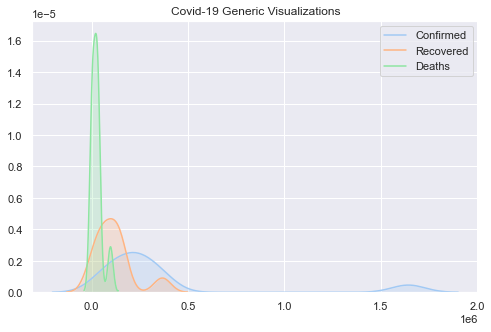

In [409]:
#kdeplots with darkgrid  showing all three visualizations
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df3.Confirmed, shade=True, label="Confirmed")
sns.kdeplot(df3.Recovered, shade=True, label="Recovered")
sns.kdeplot(df3.Deaths, shade=True, label="Deaths")
plt.title("Covid-19 Generic Visualizations")
plt.legend()
plt.show()

## Box Plots

In [411]:
con = ['United Kingdom', 'Spain', 'US', 'Italy', 'Brazil']
df5=df2[df2['Country'].isin(con)]

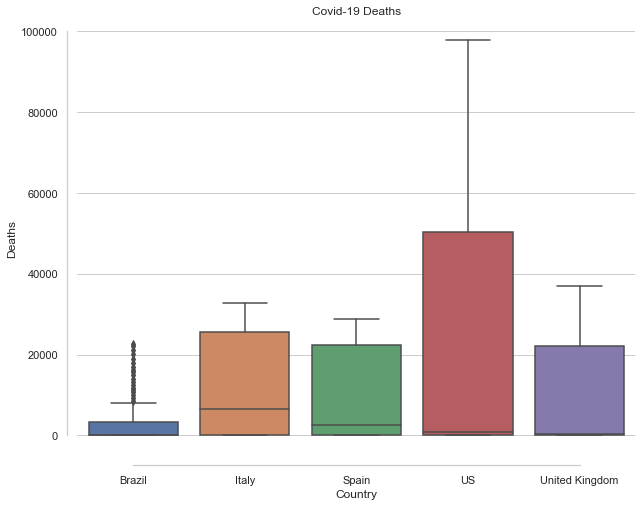

In [412]:
#boxplots with whitegrids for countries against deaths
sns.set(style="whitegrid",color_codes=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df5, x='Country', y='Deaths')
plt.title("Covid-19 Deaths")
sns.despine(offset=10,trim=True)
sns.set_palette("Paired")
plt.show()

## Violin Plots

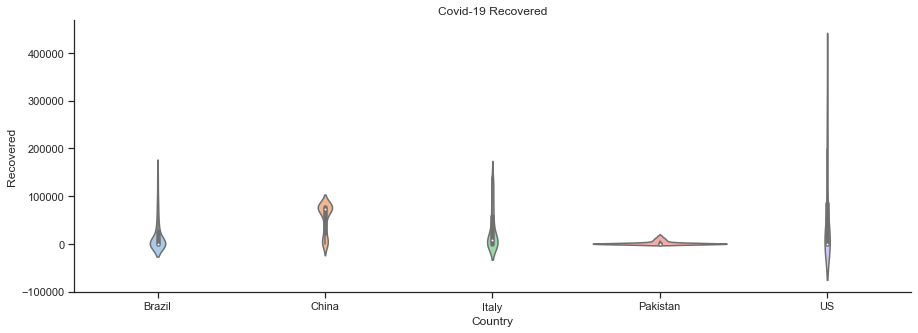

In [414]:
#violin plots with ticks style
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data=df4, x='Country', y='Recovered')
#despined to hide top and right borders
sns.despine()
plt.title("Covid-19 Recovered")
#palette set to pastel
sns.set_palette("pastel")
plt.show()

## Cat Plots

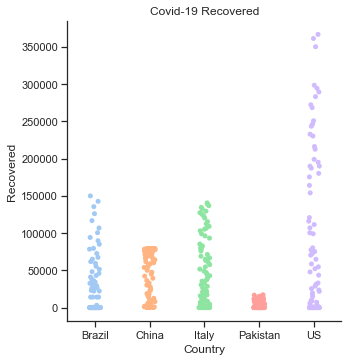

In [415]:
#catplot shown
sns.catplot(x="Country", y="Recovered", data=df4)
plt.title("Covid-19 Recovered")
plt.show()

## Multi Plots

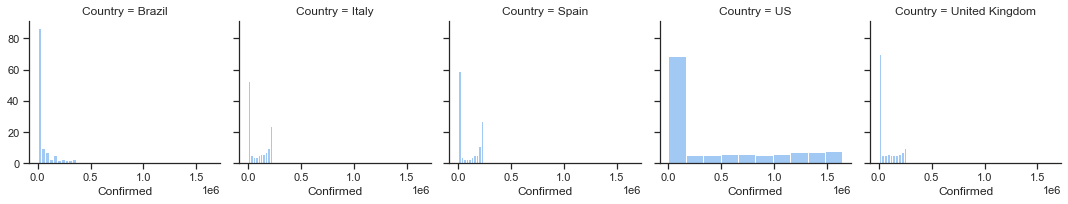

In [419]:
#multiplots for various countries mapped representing there confirmed cases
sns.set_style("ticks")
b =sns.FacetGrid (df5, col="Country")
sns.set_palette("pastel")
b.map(plt.hist , "Confirmed")
plt.show()

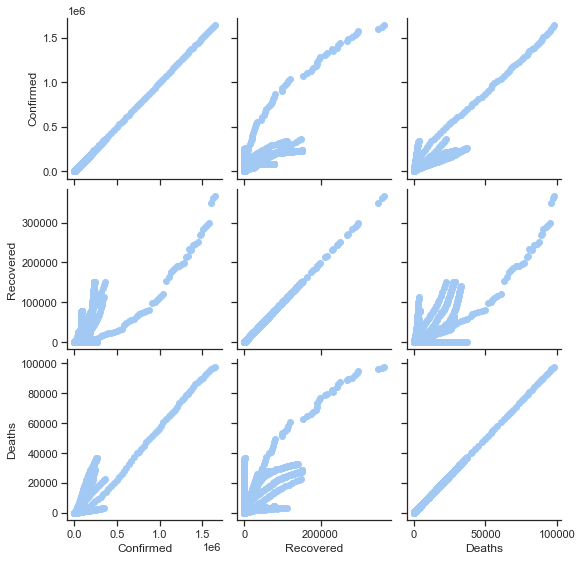

In [420]:
#pair grids shown for deaths against confirmed against recovered
b =sns.PairGrid(df2)
b.map(plt.scatter)
plt.show()